# Matplotlib Weather API Example
In this notebook, we will plot some charts to show the weather forecast for a given location.

We will use Matplotlib for plotting the charts. Before that, we will get weather data from the National Weather Service API (Application Programming Interface).

You can read about the API web service here:
[National Weather Service](https://www.weather.gov/documentation/services-web-api).

In [1]:
# Import the libraries needed for this notebook.
# We will use matplotlib.pyplot for plotting graphs
# numpy is useful for manipulating arrays
# requests is for handling http requests 
import matplotlib.pyplot as plt
import numpy as np
import requests as r

In [2]:
# First we will do some set up for making the http request for a given location.

# Set the latitude and longitude of the location.
# (You can copy and paste the numbers after the equals sign into Google Maps to see the location)
lat, long = 39.7414, -105.0054 

# The URL for the request is below.
location_url = 'https://api.weather.gov/'+f"points/{lat},{long}"

# print the URL to make sure it looks ok.
print(location_url)

https://api.weather.gov/points/39.7414,-105.0054


In [3]:
# Now we will get data from the NWS website. We will make the request to the URL we created.
# The response will come back in JSON format, which is basically a dictionary. 

# Before we make the request, we need to include the user agent in in request header.
# This is to prevent the website blocking our request.
headers = {
    'User-Agent': 'Data Science 1001 Class!'
}

# Make the http request
response = r.get(location_url, headers=headers)

# If all is well, the response code should be 200
print(response.status_code)

200


In [4]:
# The response is text in a JSON format. This is essentially the same as a Python dictionary.
json_data = response.json()
print(json_data)

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld', {'@version': '1.1', 'wx': 'https://api.weather.gov/ontology#', 's': 'https://schema.org/', 'geo': 'http://www.opengis.net/ont/geosparql#', 'unit': 'http://codes.wmo.int/common/unit/', '@vocab': 'https://api.weather.gov/ontology#', 'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'}, 'city': 's:addressLocality', 'state': 's:addressRegion', 'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'}, 'bearing': {'@type': 's:QuantitativeValue'}, 'value': {'@id': 's:value'}, 'unitCode': {'@id': 's:unitCode', '@type': '@id'}, 'forecastOffice': {'@type': '@id'}, 'forecastGridData': {'@type': '@id'}, 'publicZone': {'@type': '@id'}, 'county': {'@type': '@id'}}], 'id': 'https://api.weather.gov/points/39.7414,-105.0054', 'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-105.0054, 39.7414]}, 'properties': {'@id': 'https://api.weather.gov/points/39.7414,-105.0054', '@type': 'wx:Point', 'cwa'

In [5]:
# Now let's just look at the keys
print(json_data.keys())

dict_keys(['@context', 'id', 'type', 'geometry', 'properties'])


In [6]:
# We want the hourly forecast URL to get the relevant hourly forecast data
print(json_data['properties'])

{'@id': 'https://api.weather.gov/points/39.7414,-105.0054', '@type': 'wx:Point', 'cwa': 'BOU', 'forecastOffice': 'https://api.weather.gov/offices/BOU', 'gridId': 'BOU', 'gridX': 62, 'gridY': 62, 'forecast': 'https://api.weather.gov/gridpoints/BOU/62,62/forecast', 'forecastHourly': 'https://api.weather.gov/gridpoints/BOU/62,62/forecast/hourly', 'forecastGridData': 'https://api.weather.gov/gridpoints/BOU/62,62', 'observationStations': 'https://api.weather.gov/gridpoints/BOU/62,62/stations', 'relativeLocation': {'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [-105.062615, 39.75082]}, 'properties': {'city': 'Edgewater', 'state': 'CO', 'distance': {'unitCode': 'wmoUnit:m', 'value': 5002.5580438014}, 'bearing': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 102}}}, 'forecastZone': 'https://api.weather.gov/zones/forecast/COZ040', 'county': 'https://api.weather.gov/zones/county/COC031', 'fireWeatherZone': 'https://api.weather.gov/zones/fire/COZ240', 'timeZone': 'America/Denve

In [7]:
# This JSON file contains nested dictionaries. We want the hourly forecast URL
# which is in the 'properties' dictionary with the key 'forecastHourly'
# Let's first look at all the keys in the 'properties' dictionary.
print(json_data['properties'].keys())

dict_keys(['@id', '@type', 'cwa', 'forecastOffice', 'gridId', 'gridX', 'gridY', 'forecast', 'forecastHourly', 'forecastGridData', 'observationStations', 'relativeLocation', 'forecastZone', 'county', 'fireWeatherZone', 'timeZone', 'radarStation'])


In [10]:
# The URL we want is this value from the dictionary
forecast_hourly_url = json_data['properties']['forecastHourly']
print(forecast_hourly_url)

https://api.weather.gov/gridpoints/BOU/62,62/forecast/hourly


In [11]:
# Now we will make another http request to get the forecast for the nearest station
forecast_request = r.get(forecast_hourly_url, headers=headers)
forecast_request.status_code

200

In [14]:
# The JSON response is another dictionary. Let's examine the keys
forecast_hourly = forecast_request.json()
print(forecast_hourly.keys())

dict_keys(['@context', 'type', 'geometry', 'properties'])


In [23]:
# The properties section of the dictionary contains a list of periods of one hour.
# Each period is a dictionary with weather information like temperature, dewpoint, etc.
period_list = forecast_hourly['properties']['periods']
print(period_list[0].keys())

dict_keys(['number', 'name', 'startTime', 'endTime', 'isDaytime', 'temperature', 'temperatureUnit', 'temperatureTrend', 'probabilityOfPrecipitation', 'dewpoint', 'relativeHumidity', 'windSpeed', 'windDirection', 'icon', 'shortForecast', 'detailedForecast'])


In [32]:
# Grab the start time for the first period
start_time = period_list[0]['startTime']

# Now build a list of hourly temperatures starting from  'startTime'.
y=[]
for item in period_list:
    y.append(item['temperature'])
print(y)

[50, 49, 49, 49, 47, 47, 46, 43, 46, 45, 46, 51, 58, 64, 66, 69, 70, 69, 67, 64, 60, 57, 54, 53, 51, 49, 48, 46, 45, 44, 42, 42, 42, 43, 46, 51, 57, 63, 67, 69, 70, 69, 67, 63, 60, 57, 54, 52, 49, 48, 47, 46, 45, 44, 42, 41, 40, 41, 42, 47, 53, 58, 62, 64, 64, 63, 61, 58, 55, 53, 50, 48, 46, 44, 43, 43, 42, 41, 39, 38, 37, 37, 38, 42, 47, 51, 54, 55, 55, 54, 52, 50, 47, 45, 42, 40, 38, 36, 34, 33, 31, 30, 28, 27, 26, 25, 25, 29, 33, 38, 40, 42, 43, 42, 41, 40, 38, 36, 34, 32, 31, 30, 29, 29, 28, 27, 26, 25, 25, 26, 29, 34, 39, 44, 47, 49, 50, 49, 47, 45, 43, 41, 39, 37, 36, 35, 34, 33, 33, 32, 31, 31, 32, 33, 36, 41]


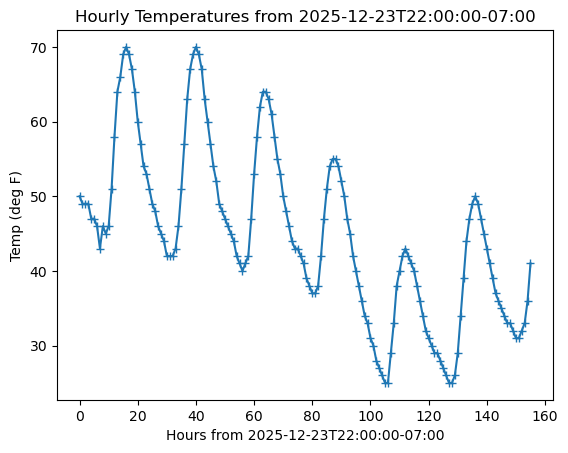

In [33]:
# Now we can plot our graph of hourly temperatures from startTime
plt.title("Hourly Temperatures from "+start_time)
plt.xlabel("Hours from "+start_time)
plt.ylabel("Temp (deg F)")
plt.plot(y, marker='+')
plt.show()